#1. https://stackoverflow.com/questions/55736800/smooth-plotting-all-columns-of-a-data-frame

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_clipboard()
data.drop(['Index'], axis=1, inplace=True)

In [ ]:
def add_smooth_plots(df, ax,  timecolumn='Date', interpolation_method='cubic', colors='rgbky'):
    from itertools import cycle
    ind = pd.to_datetime(df.loc[:, timecolumn])
    tick_labels =ind.dt.strftime("%Y-%m-%d")
    color = cycle(colors)
    for i, col in enumerate(df.columns):
        if col != timecolumn:
            c = next(color)
            s = pd.Series(df.loc[:, col].values, index=ind)
            intp = s.resample('0.5D').interpolate(method=interpolation_method)
            true_ticks = intp.index.isin(ind)
            vals = intp.values
            intp = intp.reset_index()
            ticks = intp.index[true_ticks]
            ax.plot(np.arange(len(vals)), vals, label=col, color=c)
            ax.set_xticks(ticks)
            ax.set_xticklabels(tick_labels.values, rotation=45)
            ax.legend(title='Columns')
    return ax



In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

In [ ]:
add_smooth_plots(data, ax)


In [ ]:
plt.show()


#2. https://stackoverflow.com/questions/55739440/why-unboundlocalerror-occurs-when-inner-function-assign-value-to-local-variables/55739465?noredirect=1#comment98156261_55739465

In [ ]:
Lets look at bytecode: 

import dis


def outer2():
    number = 20
    def inner():
        if number >= 20:
            number
    inner()



def outer3():
    number = 20
    def inner():
        if number >= 20:
            number = number + 1
    inner()


def outer4():
    number = 20
    def inner():
        nonlocal number
        if number >= 20:
            number = number + 1
    inner()

>>> dis.dis(outer2)
  2           0 LOAD_CONST               1 (20)
              3 STORE_DEREF              0 (number)

  3           6 LOAD_CLOSURE             0 (number)
              9 BUILD_TUPLE              1
             12 LOAD_CONST               2 (<code object inner at 0x7ff003b56b70, file "<stdin>", line 3>)
             15 LOAD_CONST               3 ('outer2.<locals>.inner')
             18 MAKE_CLOSURE             0
             21 STORE_FAST               0 (inner)

  6          24 LOAD_FAST                0 (inner)
             27 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             30 POP_TOP
             31 LOAD_CONST               0 (None)
             34 RETURN_VALUE


>>> dis.dis(outer3)
  2           0 LOAD_CONST               1 (20)
              3 STORE_FAST               0 (number)

  3           6 LOAD_CONST               2 (<code object inner at 0x7ff003b56ae0, file "<stdin>", line 3>)
              9 LOAD_CONST               3 ('outer3.<locals>.inner')
             12 MAKE_FUNCTION            0
             15 STORE_FAST               1 (inner)

  6          18 LOAD_FAST                1 (inner)
             21 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             24 POP_TOP
             25 LOAD_CONST               0 (None)
             28 RETURN_VALUE


>>> dis.dis(outer4)
  2           0 LOAD_CONST               1 (20)
              3 STORE_DEREF              0 (number)

  3           6 LOAD_CLOSURE             0 (number)
              9 BUILD_TUPLE              1
             12 LOAD_CONST               2 (<code object inner at 0x7ff003af7e40, file "<stdin>", line 3>)
             15 LOAD_CONST               3 ('outer4.<locals>.inner')
             18 MAKE_CLOSURE             0
             21 STORE_FAST               0 (inner)

  7          24 LOAD_FAST                0 (inner)
             27 CALL_FUNCTION            0 (0 positional, 0 keyword pair)
             30 POP_TOP
             31 LOAD_CONST               0 (None)
             34 RETURN_VALUE

From these examples one can see, that trying to assign to a variable (that wasn't declared as nonlocal) 
yields in `MAKE_FUNCTION` opcode. But only closures allow to get access variables out of the current scope. 
You can also read more about closures [here](https://www.geeksforgeeks.org/python-closures/).

#3. https://stackoverflow.com/questions/55739779/century-handling-in-pandas/55739904#55739904

In [6]:
data = pd.read_clipboard(header=None)

In [14]:
pd.to_datetime(data[1].apply(lambda x: '-'.join(x.split('-')[:-1] + ['19' + x.split('-')[2]])))

0   1984-01-01
1   1985-07-31
2   1985-08-24
3   1993-12-30
4   1977-09-12
5   1990-08-09
6   1988-01-06
7   1989-04-10
8   1991-11-15
9   1968-01-06
Name: 1, dtype: datetime64[ns]

In [12]:
data

,0,1
0,0,01-01-84
1,1,31-07-85
2,2,24-08-85
3,3,30-12-93
4,4,09-12-77
5,5,08-09-90
6,6,01-06-88
7,7,04-10-89
8,8,15-11-91
9,9,01-06-68


#4. https://stackoverflow.com/questions/55743251/how-to-identify-outliers-with-density-plot

In [57]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity

data = np.r_[np.random.randn(100), np.random.rand(10)*100][:, np.newaxis]

In [58]:
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(data)


In [59]:
yvals = kde.score_samples(data)
yvals[np.isinf(yvals)]=np.nan

plt.plot(yvals)

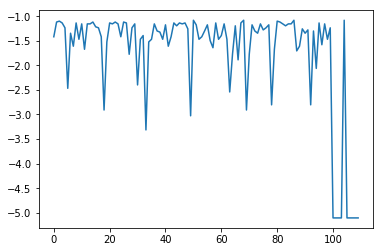

In [60]:
plt.show()

In [82]:
outlier_inds = np.where(yvals< np.percentile(yvals, 10))[0]
print(outlier_inds)
non_outlier_inds = np.where(yvals >= np.percentile(yvals, 10))[0]
print(non_outlier_inds)

[ 33  49 100 101 102 103 105 106 107 108 109]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 104]


In [91]:
plt.plot(non_outlier_inds, np.log(data[non_outlier_inds]), 'ro',
         outlier_inds, np.log(data[outlier_inds]), 'bo')
plt.gca().set_xlabel('Index')
plt.gca().set_ylabel('log(data)')
plt.legend()

/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


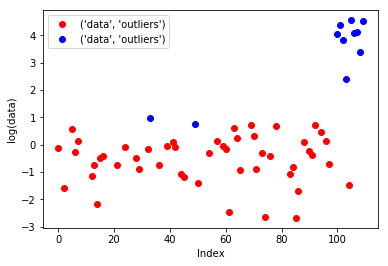

In [92]:
plt.show()


#5. https://stackoverflow.com/questions/55757907/delete-specific-rows-in-a-pandas-df/55757945#55757945

In [106]:
import pandas as pd

d = ({
    'Code' : ['Foo','Bar','Cat','Foo','Foo'],
    'Val' : ['x','y','a','a','x'],
    })

df = pd.DataFrame(d)

In [107]:
df[df.index.isin(df.index[df.Val=='x'].tolist()+(df.index[df.Val=='x'].values+1).tolist())]

,Code,Val
0,Foo,x
1,Bar,y
4,Foo,x


#5. https://stackoverflow.com/questions/55758599/how-to-add-prediction-to-polynomial-regression

It would be better if you define a class that would handle all logic you want. Nevertheless, If you want 
to write code that is fully compliant with fit-transform-predict protocol, that is used in scikit-learn, you need
to subclass from some base
classes of scikit-learn, e.g.  BaseEstimator, TransformerMixin, BaseRegressor.

Numpy supplied with very convenient function [vander](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.vander.html) that could significantly help you
when you are working with polynomials.

Lets define a class. 

In [132]:
class PolyRegressor:  # I omit subclassing for now. 
    
    def __init__(self, weights=None):
        self.weights = np.array(weights) if weights is not None else None

    @property
    def order(self):
        return len(self.weights) if self.weights is not None else 0
    
    def evaluate(self, x):
        return np.dot(np.vander(x, self.order), self.weights[:, np.newaxis]).ravel()
    
    def fit(self, X, y=None):
        self.weights = (np.linalg.pinv(np.vander(X, self.order)) @ y[:, np.newaxis]).ravel()
    
    def predict(self, X):
        if self.weights is not None: 
            return self.evaluate(X)
        else:
            raise Exception("Model wasn't fitted. Fit model first. ")
    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X)

In [133]:
reg = PolyRegressor()

In [137]:
reg.weights = np.array([1,2,3])  # we implicitly define order = 2 here, e.g. 3 + 2x + 1x^2

In [139]:
reg.evaluate(np.array([5]))

array([38])

In [135]:
reg.fit_predict(np.random.rand(10), np.random.rand(10) * 5)

array([2.55922997, 1.81433623, 2.29153779, 1.78458414, 1.75961514,
       2.59770317, 2.65122647, 1.81313616, 2.61993941, 2.63325695])

#6. https://stackoverflow.com/questions/55779483/how-to-create-a-loop-to-replace-nan-value

In [13]:
import pandas as pd
df = pd.DataFrame({'ST' : ['A']*4 + ['B']*3 + ['C']*4, 'val': [1, 2, None, None, 4, None, 3, None, 1, None, 2]})

In [14]:
df.groupby('ST').ffill()

,ST,val
0,A,1.0
1,A,2.0
2,A,2.0
3,A,2.0
4,B,4.0
5,B,4.0
6,B,3.0
7,C,NaN
8,C,1.0
9,C,1.0


In [6]:
import numpy as np
N = 10
gamma_solution = np.zeros((3, N))
gamma = np.arange(3)[:, np.newaxis]
for j in range(N):  # main loop where gamma values are computed
    gamma_solution[:, j] = gamma.T
    

In [8]:
gamma_solution

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [14]:
import numpy as np
C = np.random.random((10, 10000, 100))
B = np.random.random((10, 10000, 100))
D1 = np.einsum("ikj,ijt->ikt", C.transpose(0, 2, 1), B)
D2 = np.array([np.dot(C[k].T, B[k]) for k in range(10)])

In [17]:
np.allclose(D1, D2)

True

In [18]:
C = np.random.random((10, 10000, 100))
B = np.random.random((10, 10000, 100))
D1 = np.einsum("ikj,ijt->ikt", C.transpose(0, 2, 1), B)
D2 = np.array([np.dot(C[k].T, B[k]) for k in range(10)])

In [19]:
np.allclose(D1, D2)

True

In [25]:
from scipy.stats import randint 

randint.rvs(1, 11, size=100, loc=0)

array([ 5,  9,  2,  2,  2,  5,  1,  4,  7,  8,  4,  9,  3,  3,  4,  8,  9,
        8,  5, 10,  8,  9,  4,  1,  8,  7,  4, 10,  2,  2,  7,  3, 10,  6,
        5,  8,  2,  6,  7,  9,  9,  1,  5,  5,  7,  6,  3,  6,  6,  8,  8,
        8,  7,  4,  3,  7, 10,  3,  4,  5,  2,  2, 10, 10,  9,  3,  7,  4,
        8,  9,  8,  9,  3,  5, 10,  4,  3, 10,  3, 10,  8,  6,  1,  8,  4,
        5,  6,  1,  6,  2,  5,  2,  8,  7,  4,  3, 10,  6, 10,  1])

#7. https://stackoverflow.com/questions/55801210/plot-of-x-y-coordinates-with-their-respective-u-v-directions

It seems that you are looking for [quiver plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html). 

#8. https://stackoverflow.com/questions/55802523/how-to-prevent-seaborn-from-smoothing-the-histogram-when-plotting-a-density-plot/55803539#55803539

Probability density estimation on a given interval (strict estimation).

One of the ways to get desired result is to use custom window and kernel. Both kernel and
window should depends  on the position of the window's center relative to interval's edge points  `a` and `b`.

Searborn uses `stats.gaussian_kde` or kde estimatior from statsmodels,  if the latter is installed.
As far as I know about `gaussian_kde`, it doesn't allow such tweaking. So, we need to implement 
custom kde estimator.

Look at the following code snippet, it works and can be considered as a starting point
for further improvement.


In [4]:
arr = np.array([-0.35416853, -0.28675528, -0.54088942,  0.18797232,  0.01707244,
       -0.48090636, -0.44454523, -0.03228283, -0.70861904,  0.02323842,
       -0.54905541, -0.5421915 ,  0.27547336, -0.92913273, -0.55379011,
       -0.23521681, -0.1079175 , -0.24065031, -0.33773661, -0.06147251,
       -0.74171701, -0.74315048,  0.06634989, -0.49222919,  0.48899574,
        0.13499221,  0.53120786, -0.1688146 ,  0.47125832,  0.36517109,
        0.33110315,  0.34495851,  0.18393   ,  0.67211736,  0.11608325,
       -0.92913273, -0.71209124,  0.01828323,  0.30894561, -0.06463642,
        0.45423401, -0.7993457 ,  0.50007295,  0.17983021, -0.66105515,
       -0.92783269, -0.49277017, -0.19487059,  0.07502782,  0.00700057,
        0.29958942, -0.04223299,  0.04105657, -0.12604522,  0.30506049,
       -0.15600141, -0.17434894,  0.01152945, -0.11583157,  0.07010729,
       -0.92913273, -0.02566766,  0.48114331, -0.13252103, -0.42600686,
        0.54836633,  0.37945642, -0.34006735, -0.29560479,  0.4930249 ,
        0.02693856,  0.57255816,  0.31185216,  0.19780182,  0.11909931,
       -0.02853919, -0.25082142, -0.08635957, -0.28266912, -0.80937364,
       -0.92913273, -0.0172393 , -0.18993503, -0.69080226, -0.66901143,
        0.0470842 , -0.45307088,  0.05043218, -0.20894534, -0.22218531,
        0.5189177 , -0.92913273,  0.31509469, -0.15935917, -0.92913273,
       -0.41652189,  0.20265061,  0.016976  ,  0.0680205 ,  0.33159134,
       -0.3138477 ,  0.10086817,  0.37074665, -0.06916329, -0.19177307,
        0.22842641, -0.15087903,  0.34376167,  0.24173604, -0.38040409,
       -0.20031291,  0.17990511,  0.40231535, -0.27195479, -0.15867829,
        0.2389052 ,  0.08337308, -0.07327617, -0.77566734, -0.12074809,
        0.19539527,  0.03727124, -0.13330546,  0.13602168,  0.36673224,
       -0.3434154 ,  0.19251896,  0.27692974,  0.4757158 ,  0.24333386,
        0.29905657,  0.57319178,  0.46753947, -0.04079389,  0.5571865 ,
        0.3453707 ,  0.55110949,  0.19614831,  0.61707333,  0.3680048 ,
        0.48193126,  0.67330892,  0.53603774,  0.54464057,  0.35016492,
        0.36970268,  0.150395  ,  0.4697073 ,  0.3383952 ,  0.4037419 ,
       -0.01055328,  0.26734498,  0.2647191 ,  0.30056532,  0.46706568,
        0.41460328,  0.42295413,  0.44188908,  0.29304088, -0.18437651,
       -0.33404869,  0.31744862,  0.16578238, -0.2903621 , -0.36128032,
       -0.65571561,  0.39868119, -0.31359498,  0.45377302,  0.23929229,
        0.19958669,  0.51978988, -0.01249307, -0.16404641,  0.27193916,
       -0.11159726, -0.10719093,  0.05472177, -0.64784851,  0.25594644,
       -0.26109644, -0.28908332,  0.06264426,  0.05689891,  0.26437733,
       -0.29424862,  0.26441642,  0.34868516,  0.00497344, -0.46811445,
       -0.35795662, -0.04599685,  0.08701907, -0.32572399,  0.17639076,
        0.35640737, -0.08174591, -0.13910904,  0.35387245,  0.00857055,
       -0.24789401,  0.24033791, -0.08525459,  0.19189512,  0.27148848,
       -0.38631975, -0.08820518,  0.12658585,  0.23404602,  0.06062359,
        0.13340842, -0.11942433, -0.15974527, -0.0236961 ,  0.01533685,
       -0.92641117,  0.01533685, -0.00582898,  0.08251113, -0.18537655,
       -0.92641117, -0.63036561, -0.02408175, -0.10033362, -0.08820518,
        0.01533685, -0.1475904 , -0.06573955, -0.10033362, -0.08820518,
       -0.08820518,  0.04798457,  0.29057868,  0.08310757,  0.25168328,
        0.03989156,  0.1895359 , -0.44324531, -0.16724842,  0.06172038,
        0.05685105,  0.3381661 , -0.46472578, -0.13137012,  0.10249921,
        0.26703853,  0.14798872,  0.09729466, -0.09559039,  0.38893042,
        0.6081168 , -0.32574556, -0.11493626,  0.30370567, -0.13203101,
        0.12251789,  0.29993512, -0.80796771, -0.14717629,  0.37894796,
        0.30086822,  0.26228619, -0.01403568, -0.46596314, -0.11860131,
       -0.52649509,  0.41834337,  0.25892792,  0.40497516, -0.0287142 ,
       -0.14994142,  0.41714702,  0.40928704,  0.0595943 ,  0.5190621 ,
        0.53760238,  0.25452441, -0.08397463,  0.22131469, -0.46173602,
        0.48456617,  0.44220971,  0.16059022,  0.43723123,  0.04680989,
       -0.00131657, -0.09681387, -0.48600167, -0.44205123,  0.13787778,
       -0.02900436,  0.07049823,  0.02565475, -0.20544388,  0.0297263 ,
        0.09162641, -0.17354248, -0.41518963,  0.12393266, -0.41754063,
       -0.19018751,  0.02251257, -0.27799953,  0.21135703,  0.09597453,
        0.56175636,  0.34126265,  0.17056669,  0.13149045, -0.30472518,
       -0.07366951,  0.42843431, -0.22890901,  0.05518269, -0.01007775,
       -0.48123104, -0.44906545,  0.09229373, -0.85684002,  0.23411821,
        0.02637603,  0.02477345,  0.21678001, -0.14454807,  0.32430986,
       -0.12988135,  0.07014938,  0.17991853, -0.02405694, -0.83110188,
       -0.11192697,  0.02312546, -0.10770876,  0.13470276,  0.10568144,
       -0.20336714, -0.15739212,  0.21271663,  0.05357167,  0.3281988 ,
        0.17442453,  0.11561338, -0.68398479, -0.03704769,  0.28698584,
        0.17608064,  0.30424182,  0.51034264, -0.09452418,  0.38242868,
       -0.60014916,  0.21856565, -0.04819684,  0.2653766 ,  0.02992649,
        0.18941891, -0.04752845,  0.02295903, -0.29201727,  0.07913569,
       -0.12563984,  0.21124929, -0.18801383, -0.24118712, -0.29686842,
        0.27609838, -0.23855832,  0.31970457,  0.41328374,  0.19630546,
        0.34077982, -0.3704136 ,  0.17032295,  0.20643397,  0.34154881,
        0.1504677 ,  0.37392242,  0.25842101, -0.50553798,  0.35387764,
        0.41873554,  0.27067669,  0.31011181, -0.51092977, -0.10282291,
       -0.4126883 , -0.52383119, -0.82821877, -0.4585979 ,  0.2531493 ,
        0.34361492,  0.38418371, -0.22988404,  0.285816  , -0.40203361,
        0.38114577,  0.15781548,  0.27335741,  0.36371593,  0.36515941])


In [31]:
import numpy as np
from scipy.integrate import quad

class kde:
    
    def __init__(self, a, b, kernel=None):
        self.a = a
        self.b = b
    
    def h(self, x):
        """ h(x) window size depends on position of the center of the window relative to (a, b).
         
        _ r    ___________   <-- rthumb = r = height of the graph
        |     /           \ 
        |    /             \
        |---|--|----------|-|----- 
            a  a+r      b-r b
       
        """
        
        if x > (self.a + self.rthumb) and x < (self.b - self.rthumb):
            return self.rthumb
        elif x >= self.a and (x < self.a + self.rthumb):
            return x - self.a + np.finfo(float).eps
        elif (x <= self.b) and (x > self.b - self.rthumb):
            return self.b - x + np.finfo(float).eps
        else:
            return np.finfo(float).eps
    
    def kernel(self, x):
        return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi);
    
    def window(self, x):
        """ x - scalar value """
        def w(y):
            res = self.kernel((x - y) / self.h(x))  # gaussian kernel
            res[(y > self.b) | (y < self.a)] = 0.0  # window is zero outside [a, b]~
            return res
        return w
    
    def fit(self, data):
        # Rule of thumb
        self.rthumb = 1.06 * np.std(data) * np.power(len(data), -1/5) 
        def _pdf(x):
            ww = self.window(x)
            return ww(data).sum() / len(data)
        val = quad(_pdf, self.a, self.b)[0]
        def pdf_norm(f):
            def pn(x):
                return f(x) / val
            return pn
        self.pdf = np.vectorize(pdf_norm(_pdf))
        return self

In [32]:
k = kde(-1, 1)

In [33]:
from pylab import plt
x = np.linspace(-2,  2, 100)
plt.plot(x, k.fit(arr).pdf(x))

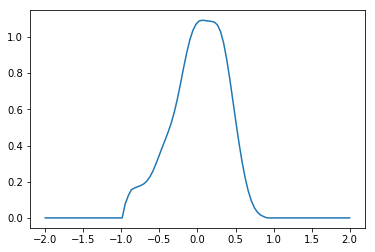

In [34]:
plt.show()

In [35]:
r = k.window(0.9)

In [28]:
plt.plot(x, k.window(0.9)(x), 'r.', x, k.window(0)(x), x, k.window(-.9)(x),'r.')

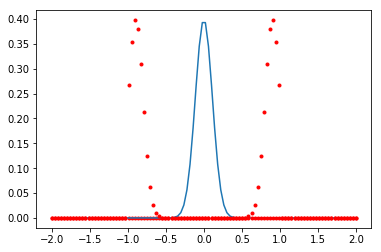

In [29]:
plt.show()

EDITED:

I added small value (float's epsilon 1) to h(x) value, and now everything works without warnings.

In general, trying to obtain kernel density estimation is made under assumption that the theoretical pdf is a smooth function. In your case, you can truncate the pdf obtained using gaussian_kde from scipy, and finally add some constant to truncated estimation to meet AUC = 1. Some distributions have discontinuities of the first kind, e.g. pdf of the uniform distribution.

#9. https://stackoverflow.com/questions/55825624/remove-rows-from-2-dataframes-containing-1/55825806#55825806

In [50]:
submission = submission[~(test_label_df == -1).any(axis=1)]
test_label_df = test_label_df[~(test_label_df == -1).any(axis=1)]

NameError: name 'submission' is not defined

In [51]:
data = np.mgrid[0:6, 0:2].reshape(3,-1).T
window_length=3
value = np.zeros(len(data) - window_length + 1)


for j in range(0,len(data)-window_length):
    window_mean = np.mean(data[j:j + window_length,:], axis=1)
    for k in range(j, j + window_length):
        #just some operation  
        value[j] = np.matmul(np.transpose(data[k,:]), data[k, :] + window_mean)

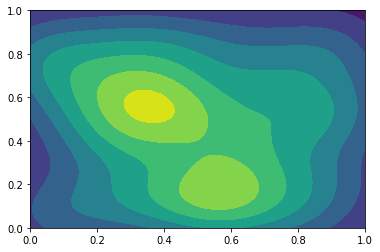

In [98]:
import numpy as np
from scipy.stats import gaussian_kde
from pylab import plt

np.random.seed(10)

x = np.random.rand(100)
y = np.random.rand(100)
kde = gaussian_kde(np.vstack([x, y]))
X, Y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = kde(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.contourf(X, Y, Z)
plt.show()

In [101]:
X.ravel()[np.argmax(Z.ravel())]

0.3535353535353536

In [100]:
Y.ravel()[np.argmax(Z.ravel())]

0.5555555555555556

1.231809221230128

In [ ]:
X.ravel()[Z.ravel()>np.percentile(Z, 90)]
Y.ravel()[Z.ravel()>np.percentile(Z, 90)]